In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.RandomState(0)
n_samples, n_features = 1000, 2
X = rng.uniform(low=(-10, -10), high=(10, 10), size=(n_samples, 2))
print("data shape: (%d, %d)" % (n_samples, n_features))

data shape: (1000, 2)


In [3]:
from scipy.stats import multivariate_normal

def target_func(X, noise=0, seed=0):
    rng = np.random.RandomState(seed)
    y = multivariate_normal(mean=(5, 0), cov=5).pdf(X)
    y += multivariate_normal(mean=(-5, 0), cov=5).pdf(X)
    y -= multivariate_normal(mean=(0, 5), cov=3).pdf(X)
    y -= multivariate_normal(mean=(0, -5), cov=3).pdf(X)
    if noise > 0:
        y += rng.normal(scale=noise, size=y.shape)
    return y


y = target_func(X, noise=0.01)
print(y.shape)

(1000,)


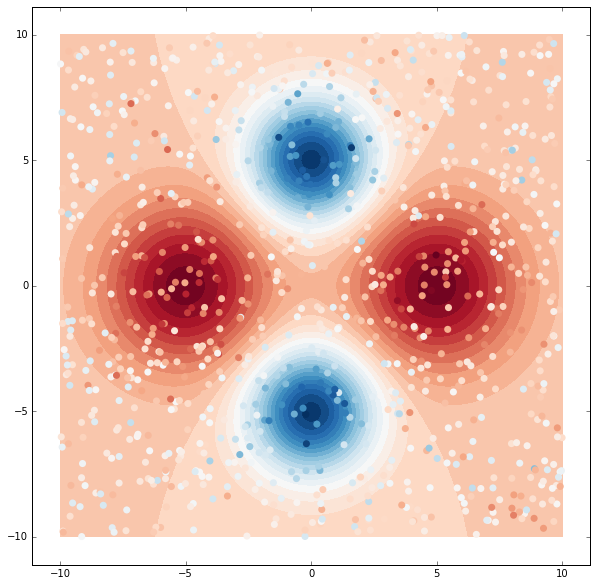

In [4]:
plt.figure(figsize=(10, 10))

def plot_background_2d(func, low=-10, high=10, resolution=100):
    x1 = np.linspace(low, high, resolution)
    x2 = np.linspace(low, high, resolution)
    xx1, xx2 = np.meshgrid(x1, x2)
    zz = func(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(resolution, resolution)
    plt.contourf(xx1, xx2, zz, 30, cmap=plt.cm.RdBu_r)
                     
plot_background_2d(target_func)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='none', cmap=plt.cm.RdBu_r);

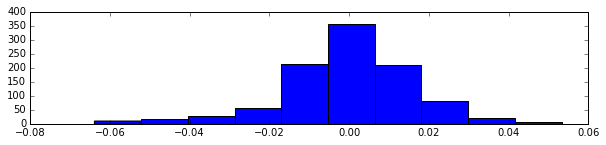

In [5]:
plt.figure(figsize=(10, 2))
plt.hist(y);

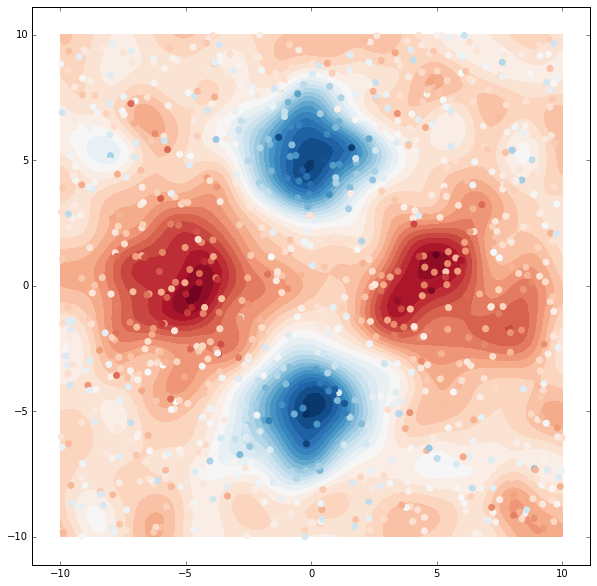

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor

plt.figure(figsize=(10, 10))
gpr = GaussianProcessRegressor(alpha=1).fit(X, y)
plot_background_2d(gpr.predict)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='none', cmap=plt.cm.RdBu_r);

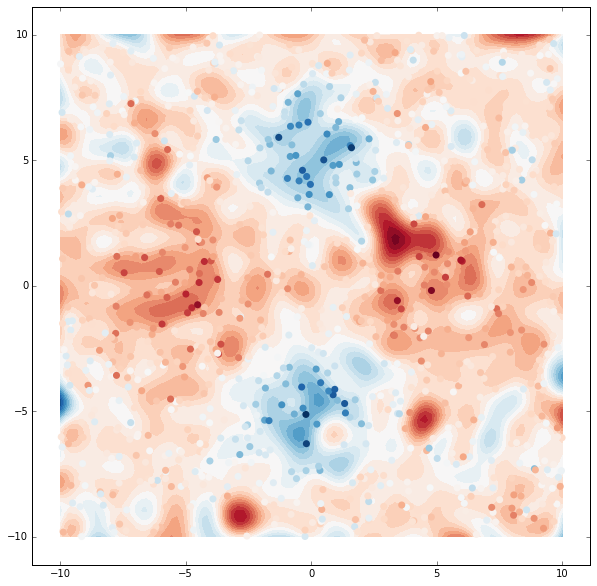

In [7]:
plt.figure(figsize=(10, 10))
gpr = GaussianProcessRegressor(alpha=1e-3).fit(X, y)
plot_background_2d(gpr.predict)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='none', cmap=plt.cm.RdBu_r);

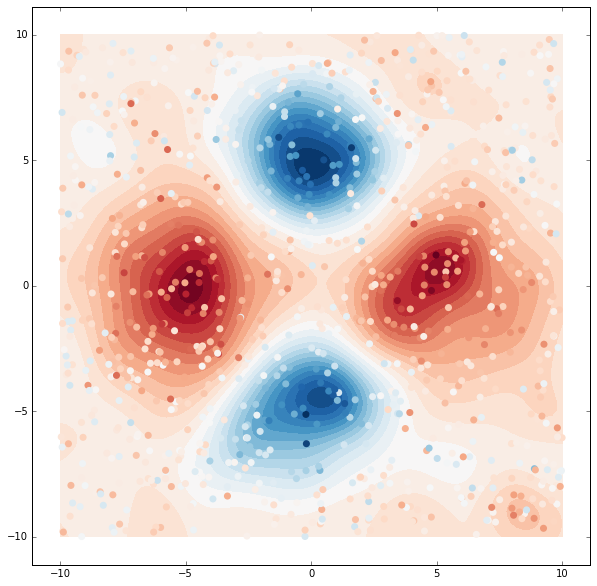

In [8]:
plt.figure(figsize=(10, 10))
gpr = GaussianProcessRegressor(alpha=1e6).fit(X, y)
plot_background_2d(gpr.predict)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='none', cmap=plt.cm.RdBu_r);

In [9]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [10]:
def plot_learning_curve(estimator, X, y, title=None, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.logspace(-2, 0, 6),
                        scoring=None):
    plt.figure()
    if title is not None:
        plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.xscale("log")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    print("CV scores:\n%s" % test_scores_mean)
    return plt

CV scores:
[ -2.48086604e-04  -2.27338304e-04  -2.45413931e-04  -1.32146608e-03
  -4.99104079e-03  -4.58467820e-01]


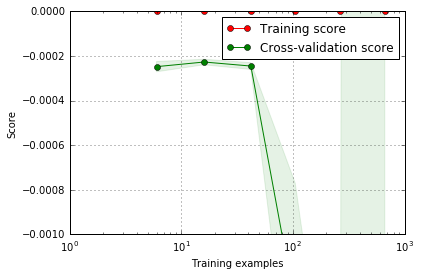

In [11]:
cv = ShuffleSplit(n_iter=200)
ylim = (-1e-3, 0)
scoring = 'mean_squared_error'

plot_learning_curve(GaussianProcessRegressor(alpha=1e-10), X, y, n_jobs=-1,
                    ylim=ylim, scoring=scoring);

CV scores:
[-0.00024809 -0.00022705 -0.00024319 -0.00047655 -0.00066444 -0.0003979 ]


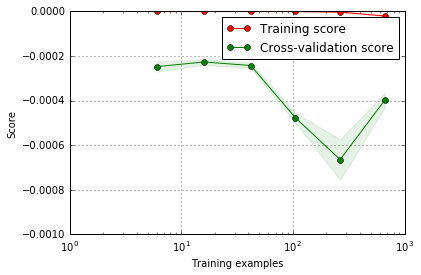

In [12]:
plot_learning_curve(GaussianProcessRegressor(alpha=1e-3), X, y, n_jobs=-1,
                    ylim=ylim, scoring=scoring);

CV scores:
[-0.00025412 -0.00023907 -0.00022434 -0.00018629 -0.00014559 -0.00011696]


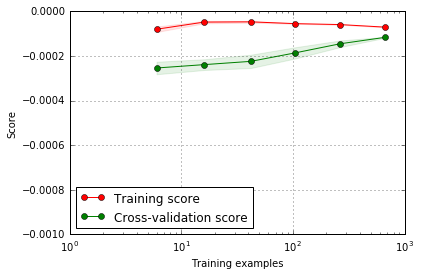

In [13]:
plot_learning_curve(GaussianProcessRegressor(alpha=1), X, y, n_jobs=-1,
                   ylim=ylim, scoring=scoring);

CV scores:
[-0.00026446 -0.00026121 -0.00025687 -0.0002392  -0.0002055  -0.00015483]


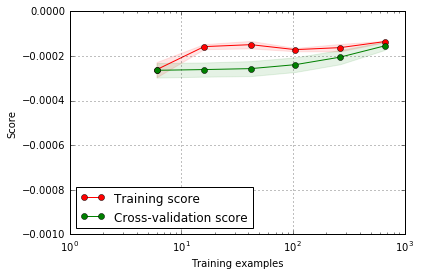

In [14]:
plot_learning_curve(GaussianProcessRegressor(alpha=10), X, y, n_jobs=-1,
                   ylim=ylim, scoring=scoring);

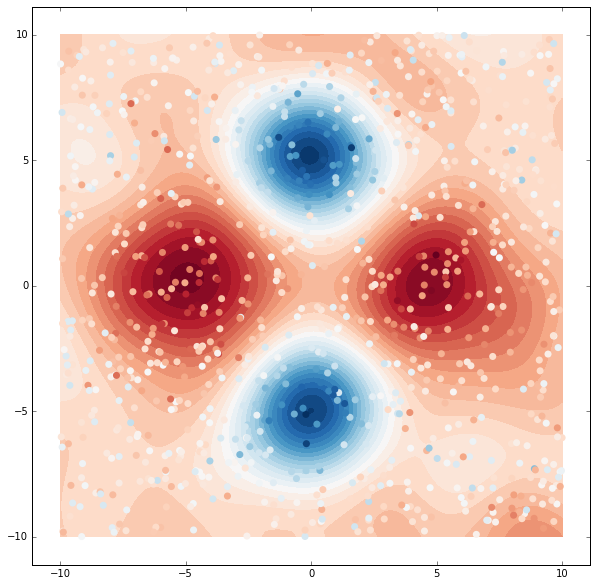

In [15]:
from sklearn.kernel_ridge import KernelRidge

plt.figure(figsize=(10, 10))
kr = KernelRidge(kernel='rbf', gamma=0.1, alpha=1).fit(X, y)
plot_background_2d(kr.predict)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='none', cmap=plt.cm.RdBu_r);

CV scores:
[-0.00023781 -0.00020958 -0.00018065 -0.00014726 -0.00011938 -0.00010562]


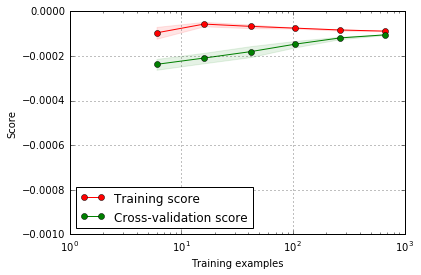

In [16]:
plot_learning_curve(KernelRidge(kernel='rbf', gamma=1e-1, alpha=1), X, y, n_jobs=-1,
                    ylim=ylim, scoring=scoring);

CV scores:
[-0.00023793 -0.00020644 -0.00028555 -0.00027252 -0.000161   -0.00011999]


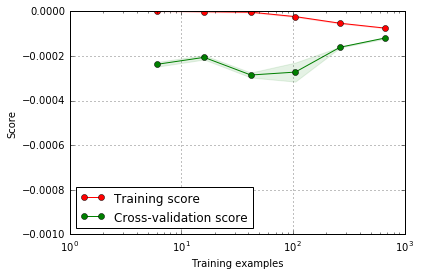

In [17]:
plot_learning_curve(KernelRidge(kernel='rbf', gamma=1e-1, alpha=1e-2), X, y, n_jobs=-1,
                    ylim=ylim, scoring=scoring);

CV scores:
[-0.00166822 -0.00104299 -0.00021508 -0.00015003 -0.0001254  -0.00011128]


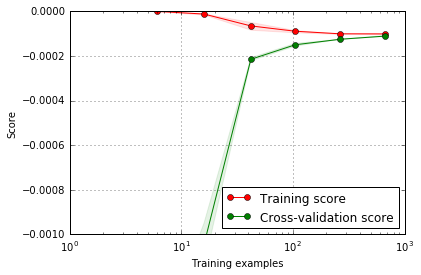

In [18]:
plot_learning_curve(KernelRidge(kernel='rbf', gamma=1e-2, alpha=1e-3), X, y, n_jobs=-1,
                    ylim=ylim, scoring=scoring);

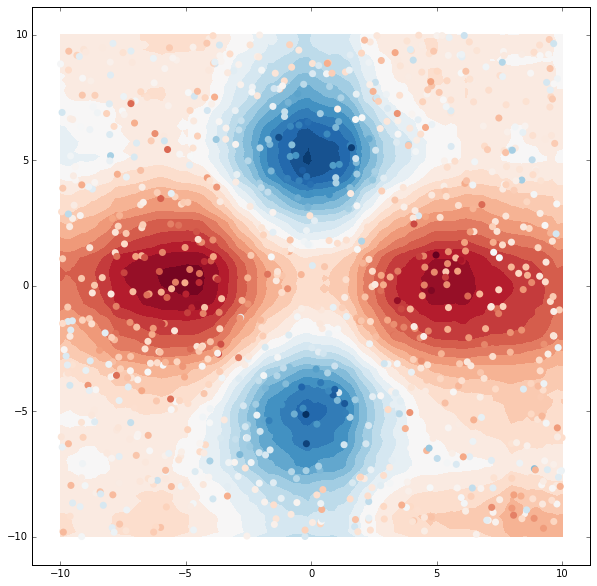

In [27]:
from sklearn.ensemble import ExtraTreesRegressor

plt.figure(figsize=(10, 10))
et = ExtraTreesRegressor(n_estimators=500, n_jobs=-1, max_depth=5).fit(X, y)
plot_background_2d(et.predict)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='none', cmap=plt.cm.RdBu_r);

CV scores:
[-0.00033218 -0.00022534 -0.0001895  -0.00016842 -0.00014461 -0.00012333]


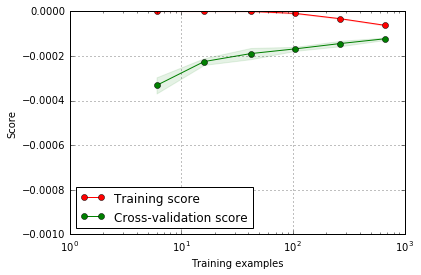

In [20]:
plot_learning_curve(ExtraTreesRegressor(n_estimators=500, max_depth=8), X, y, n_jobs=-1,
                    ylim=ylim, scoring=scoring);

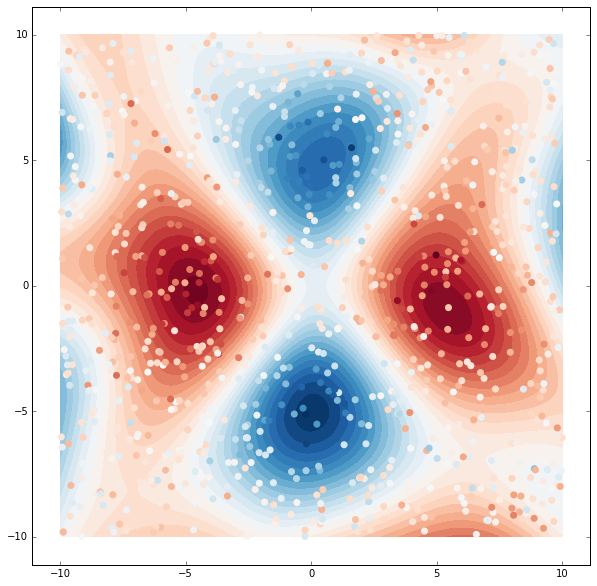

In [23]:
from sklearn.neural_network import MLPRegressor

plt.figure(figsize=(10, 10))
mlp = MLPRegressor(hidden_layer_sizes=100, algorithm='l-bfgs', alpha=1e-2, activation='tanh').fit(X, y)
plot_background_2d(mlp.predict)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='none', cmap=plt.cm.RdBu_r);

CV scores:
[-0.00060985 -0.00036906 -0.00026554 -0.00020765 -0.00013817 -0.00012607]


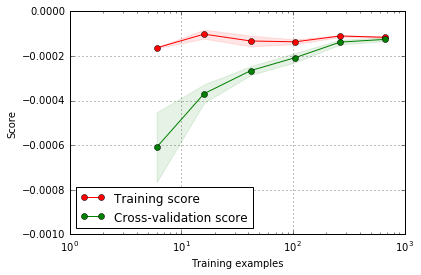

In [22]:
mlp = MLPRegressor(hidden_layer_sizes=100, algorithm='l-bfgs', alpha=1e-2, activation='tanh')
plot_learning_curve(mlp, X, y, n_jobs=-1, ylim=ylim, scoring=scoring);